In [7]:
import multiscale_phate
import pandas as pd
import numpy as np
import scprep

In [2]:
### Larger dataset

path = "/data/lab/datasets/Iwasaki_covid_facs/variables/data_7_24_2020/patients_only/"
facs_sqrt = pd.read_pickle(path+"myeloid_sqrt.pickle")

In [3]:
chosen_idx = np.random.choice(facs_sqrt.shape[0], replace=False, size=2000000)

In [4]:
subset_sqrt = facs_sqrt.iloc[chosen_idx[:500000],:]
superset_sqrt = facs_sqrt.iloc[chosen_idx[500000:],:]
subset_sqrt.shape, superset_sqrt.shape

((500000, 12), (1500000, 12))

In [5]:
mp_op = multiscale_phate.Multiscale_PHATE(partitions=25000)
hp_embedding, cluster_viz, sizes_viz, tree = mp_op.fit_transform(superset_sqrt)

Calculating Multiscale PHATE tree...
  Calculating PCA...
  Calculated PCA in 0.98 seconds.
  Calculating partitions...
  Calculated partitions in 218.82 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 27.09 seconds.
  Setting epsilon to 1.1436
  Setting merge threshold to 0.001
  Calculating condensation...
  Calculated condensation in 142.66 seconds.
Calculated Multiscale PHATE tree in 431.81 seconds.
Calculating base visualization...
Calculated base visualization in 0.74 seconds.
Calculating tree...
Calculated tree in 16.88 seconds.


<AxesSubplot:xlabel='Multiscale-PHATE1', ylabel='Multiscale-PHATE2'>

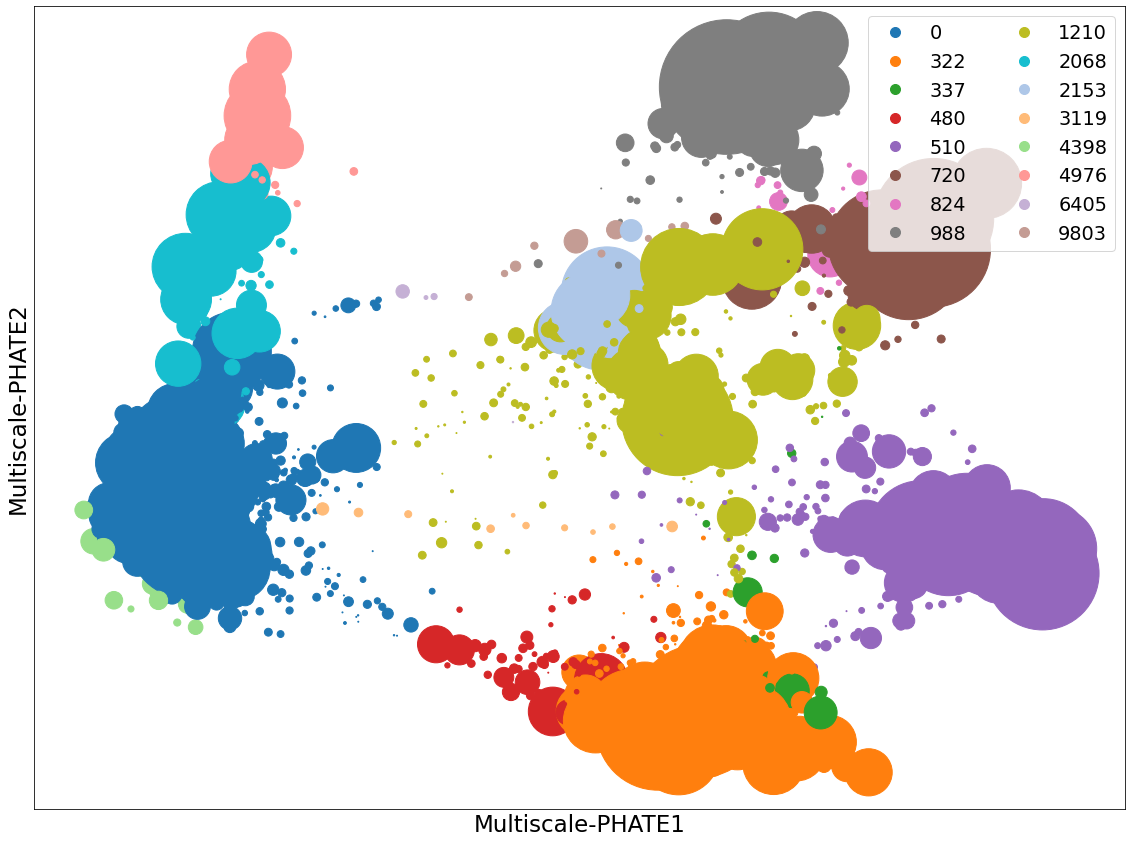

In [8]:
scprep.plot.scatter2d(hp_embedding, s = sizes_viz, c = cluster_viz,
                      fontsize=16, ticks=False,label_prefix="Multiscale-PHATE", figsize=(16,12))

/home/scottgigante/.local/lib/python3.8/site-packages/scprep/plot/tools.py:247: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  mappable = plot_axis.imshow(


<Axes3DSubplot:xlabel='C-PHATE1', ylabel='C-PHATE2'>

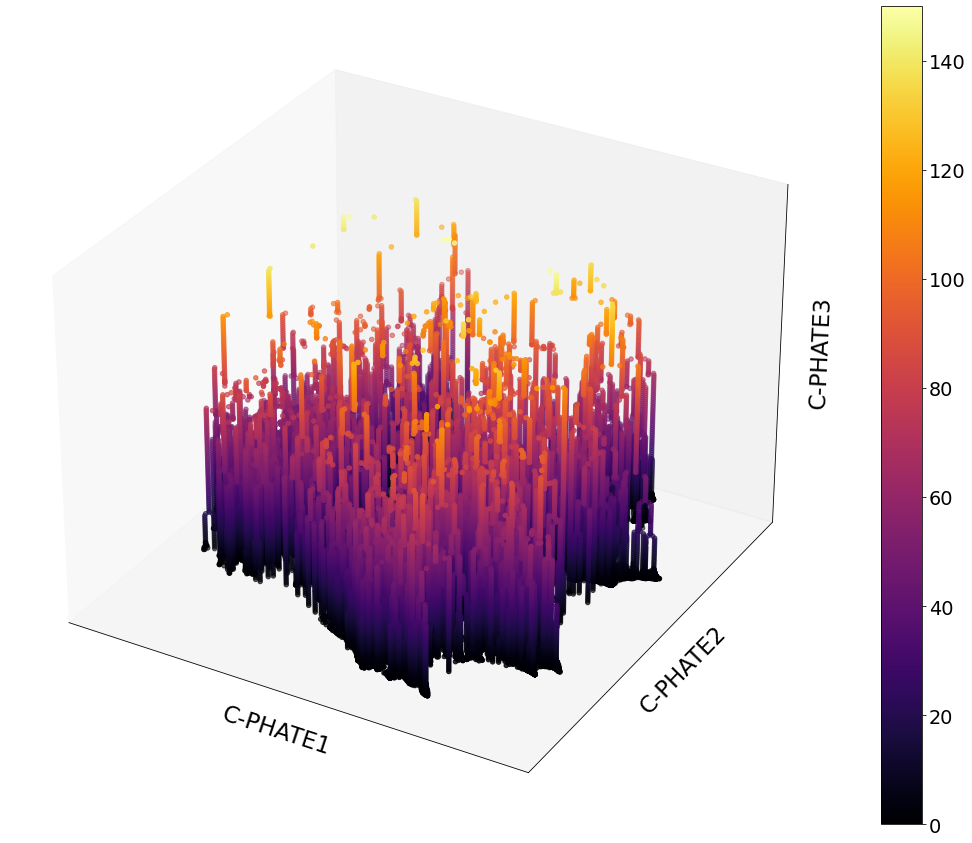

In [9]:
scprep.plot.scatter3d(tree, c=tree[:,2],fontsize=16, ticks=False, label_prefix="C-PHATE", figsize=(16,12), s=20)

In [ ]:
### updating

In [10]:
hp_embedding_2, cluster_viz_2, sizes_viz_2, tree_2 = mp_op.transform(subset_sqrt)

Calculating Multiscale PHATE tree mapping...
  PCA compressing new data...
  Calculating map to computed partitions...
  Calculated map to computed partitions in 204.86 seconds.
  Points not mapped to partitions: 254
  Calculating extended diffusion potential...
    Calculating extended kernel...
    Calculated extended kernel in 0.82 seconds.
  Calculated extended diffusion potential in 2.17 seconds.
  Setting epsilon to 1.1449
  Setting merge threshold to 0.001
  Calculating condensation...
  Calculated condensation in 155.76 seconds.
Calculated Multiscale PHATE tree mapping in 407.26 seconds.
Calculating base visualization...


/home/scottgigante/.local/lib/python3.8/site-packages/phate/phate.py:877: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(


Calculated base visualization in 15.84 seconds.
Calculating tree...
Calculated tree in 30.43 seconds.


<AxesSubplot:xlabel='Multiscale-PHATE1', ylabel='Multiscale-PHATE2'>

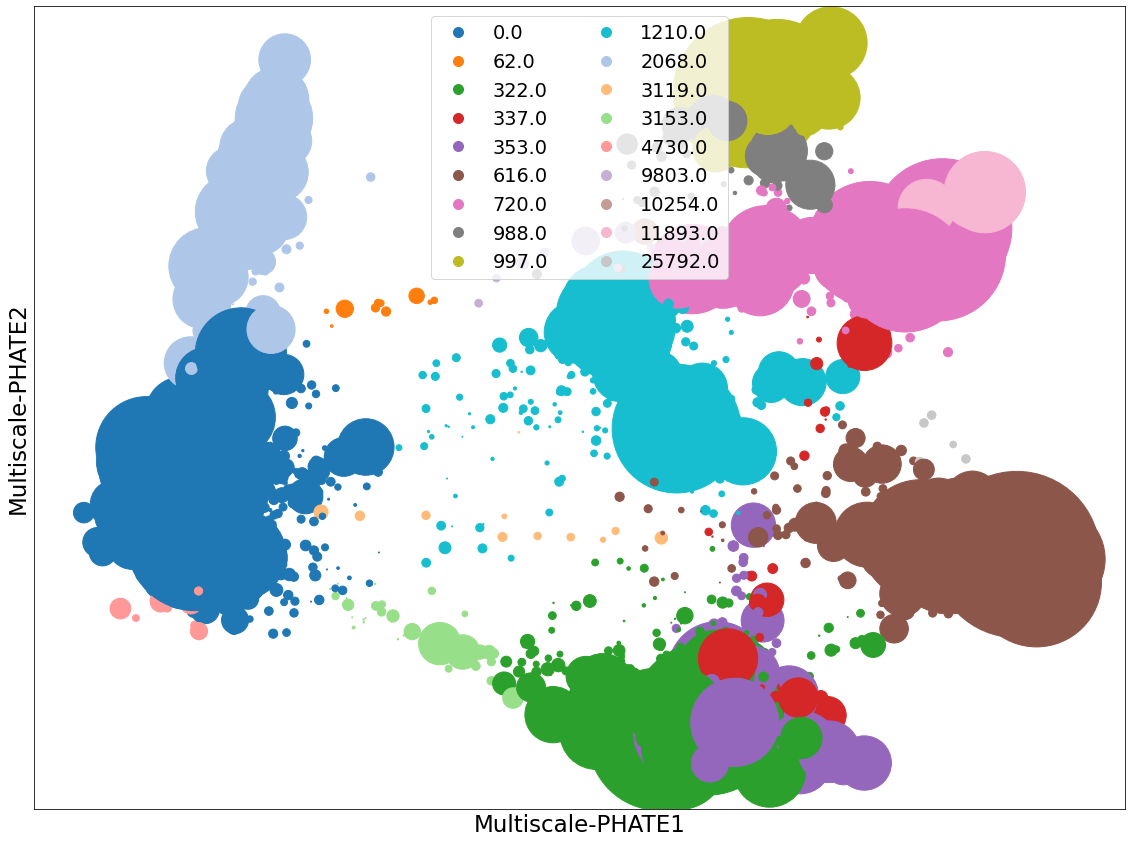

In [11]:
scprep.plot.scatter2d(hp_embedding_2, s = sizes_viz_2, c = cluster_viz_2,
                      fontsize=16, ticks=False,label_prefix="Multiscale-PHATE", figsize=(16,12))

/home/scottgigante/.local/lib/python3.8/site-packages/scprep/plot/tools.py:247: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  mappable = plot_axis.imshow(


<Axes3DSubplot:xlabel='C-PHATE1', ylabel='C-PHATE2'>

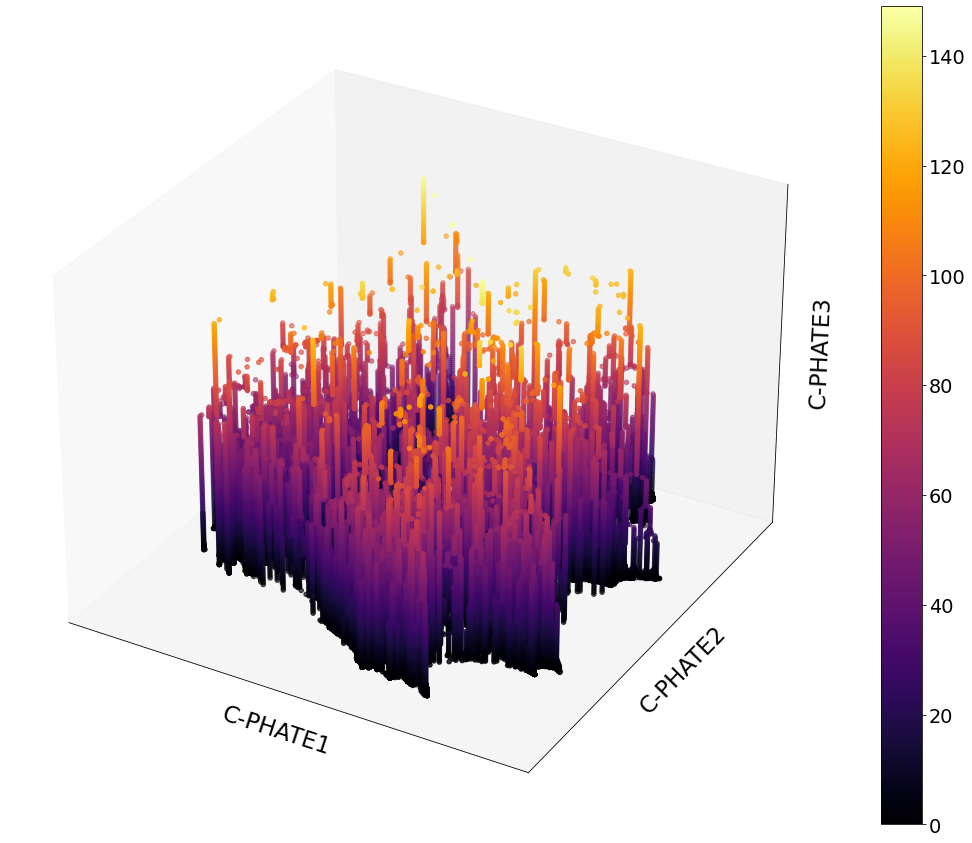

In [12]:
scprep.plot.scatter3d(tree_2, c=tree_2[:,2],fontsize=16, ticks=False, label_prefix="C-PHATE", figsize=(16,12), s=20)